# The importance of diversification in a portfolio under the CAPM model

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [118]:
%pip install matplotlib-venn
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [119]:
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
from dataproject import StockData


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


New try using the PY-file way more than before.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


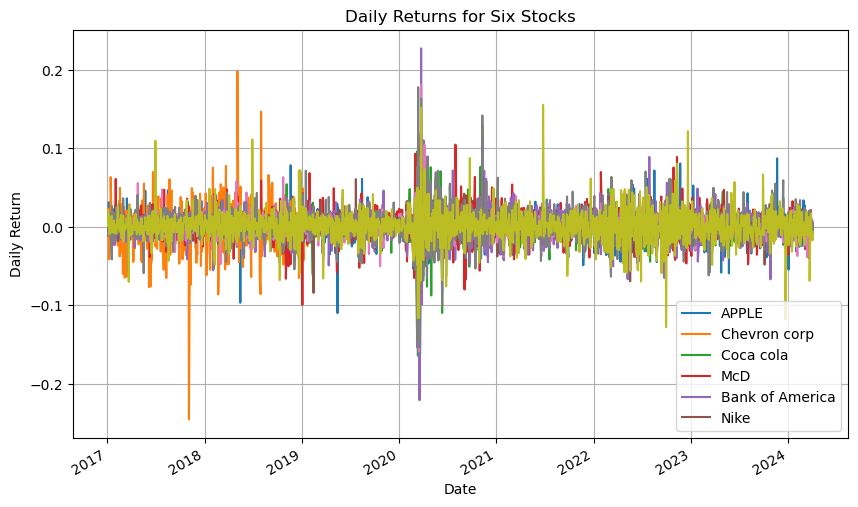

In [120]:
# Call the six_stocks_ method to calculate daily returns and get the DataFrame
df = SD.six_stocks_()

# Plot the DataFrame with explicit legend labels
df.plot(figsize=(10, 6))
plt.title('Daily Returns for Six Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Set legend labels to ticker symbols
plt.legend(['APPLE', 'Chevron corp', 'Coca cola', 'McD', 'Bank of America', 'Nike'])

plt.grid(True)
plt.show()


In [134]:
# Call the expected_return_ method to calculate expected returns
expected_returns_df = SD.expected_return_()

# Filter out unwanted ticker symbols
expected_returns_df_filtered = expected_returns_df[~expected_returns_df.index.isin(["A", "P", "L"])]

# Display the filtered DataFrame containing the expected returns
display(expected_returns_df_filtered)

,Expected Return (%)
Ticker,
AAPL,0.118518
CVX,0.053565
KO,0.039587
MCD,0.064281
BAC,0.057442
NKE,0.053610


We want to merge our different data into one. 

In [122]:
danske = pd.read_csv('DANSKE.CO.csv')
maersk = pd.read_csv('MAERSK-B.CO.csv')
novo = pd.read_csv('NOVO-B.CO.csv')
iss = pd.read_csv('ISS.CO.csv')
c25 = pd.read_csv('OMXC25.csv')

In [123]:
#Merge af "Close", altså closing price for hver aktie og c25 index:

# Read CSV files with only 'Date' and 'Close' columns
danske_df = pd.read_csv('DANSKE.CO.csv', usecols=['Date', 'Close'])
maersk_df = pd.read_csv('MAERSK-B.CO.csv', usecols=['Date', 'Close'])
novo_df = pd.read_csv('NOVO-B.CO.csv', usecols=['Date', 'Close'])
iss_df = pd.read_csv('ISS.CO.csv', usecols=['Date', 'Close'])
c25_df = pd.read_csv('OMXC25.csv', usecols=['Date', 'Close'])

# Convert 'Date' column to datetime format
danske_df['Date'] = pd.to_datetime(danske_df['Date'])
maersk_df['Date'] = pd.to_datetime(maersk_df['Date'])
novo_df['Date'] = pd.to_datetime(novo_df['Date'])
iss_df['Date'] = pd.to_datetime(iss_df['Date'])
c25_df['Date'] = pd.to_datetime(c25_df['Date'])

# Merge DataFrames
merged_df = pd.merge(danske_df, maersk_df, on='Date', suffixes=('_Danske', '_Maersk'))
merged_df = pd.merge(merged_df, novo_df, on='Date', suffixes=('_Merged', '_Novo'))
merged_df = pd.merge(merged_df, iss_df, on='Date', suffixes=('_Merged', '_ISS'))
merged_df = pd.merge(merged_df, c25_df, on='Date', suffixes=('_Merged', '_C25'))

# Save Merged DataFrame
merged_df.to_csv('merged_stock_prices.csv', index=False)

In [124]:
#Forsøg på merge af "Close", altså closing price for hver aktie og c25 index i tidsintervallet 01-01-2017 til 04-04-2024

danske_df = pd.read_csv('DANSKE.CO.csv', usecols=['Date', 'Close'])
maersk_df = pd.read_csv('MAERSK-B.CO.csv', usecols=['Date', 'Close'])
novo_df = pd.read_csv('NOVO-B.CO.csv', usecols=['Date', 'Close'])
iss_df = pd.read_csv('ISS.CO.csv', usecols=['Date', 'Close'])
c25_df = pd.read_csv('OMXC25.csv', usecols=['Date', 'Close'])

# Convert 'Date' column to datetime format
danske_df['Date'] = pd.to_datetime(danske_df['Date'])
maersk_df['Date'] = pd.to_datetime(maersk_df['Date'])
novo_df['Date'] = pd.to_datetime(novo_df['Date'])
iss_df['Date'] = pd.to_datetime(iss_df['Date'])
c25_df['Date'] = pd.to_datetime(c25_df['Date'])

# Filter rows based on date range
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2024-04-04')

danske_df_filtered = danske_df[(danske_df['Date'] >= start_date) & (danske_df['Date'] <= end_date)]
maersk_df_filtered = maersk_df[(maersk_df['Date'] >= start_date) & (maersk_df['Date'] <= end_date)]
novo_df_filtered = novo_df[(novo_df['Date'] >= start_date) & (novo_df['Date'] <= end_date)]
iss_df_filtered = iss_df[(iss_df['Date'] >= start_date) & (iss_df['Date'] <= end_date)]
c25_df_filtered = c25_df[(iss_df['Date'] >= start_date) & (c25_df['Date'] <= end_date)]

# Merge DataFrames
merged_df = pd.merge(danske_df_filtered, maersk_df_filtered, on='Date', suffixes=('_Danske', '_Maersk'))
merged_df = pd.merge(merged_df, novo_df_filtered, on='Date', suffixes=('_Novo','_Merged'))
merged_df = pd.merge(merged_df, iss_df_filtered, on='Date', suffixes=('_Merged', '_ISS'))
merged_df = pd.merge(merged_df, c25_df_filtered, on='Date', suffixes=('_C25', '_Merged'))

# Save Merged DataFrame
merged_df.to_csv('merged_stock_price.csv', index=False)

C:\Users\simon\AppData\Local\Temp\ipykernel_31860\1977707360.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c25_df_filtered = c25_df[(iss_df['Date'] >= start_date) & (c25_df['Date'] <= end_date)]


In [125]:
#Testing to see if data has been loaded correctly, so we ask for the first five rows in each dataset:

print("Danske Bank Data:")
print(danske.head())

print("Maersk Data:")
print(maersk.head())

print("Novo Nordisk Data:")
print(novo.head())

print("ISS Data:")
print(iss.head())

print("OMXC25 Data:")
print(c25.head())

Danske Bank Data:
         Date        Open        High         Low       Close  Adj Close  \
0  2010-01-04  113.357704  113.357704  111.969650  111.969650  79.192848   
1  2010-01-05  115.671120  115.671120  115.671120  115.671120  81.810791   
2  2010-01-06  115.393517  117.706932  115.208443  117.059174  82.792519   
3  2010-01-07  120.760651  120.760651  120.760651  120.760651  85.410454   
4  2010-01-08  122.148705  125.109886  120.390503  122.611389  86.719429   

    Volume  
0  1167663  
1  2579165  
2  1194446  
3  3984546  
4   748730  
Maersk Data:
         Date         Open         High          Low        Close  \
0  2010-01-04  6398.973145  6612.854492  6398.973145  6612.854492   
1  2010-01-05  6664.745117  6664.745117  6664.745117  6664.745117   
2  2010-01-06  6712.819336  6782.562988  6712.819336  6730.255371   
3  2010-01-07  6725.024414  7000.511719  6712.819336  6972.614258   
4  2010-01-08  7131.280762  7131.280762  7131.280762  7131.280762   

     Adj Close  Vol

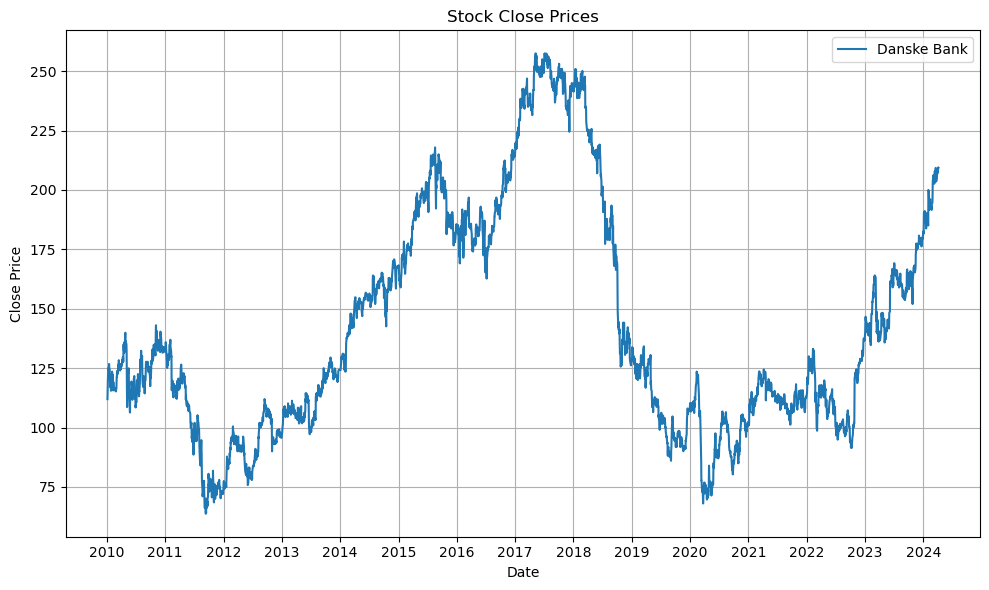

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have already loaded danske DataFrame

# Convert 'Date' column to datetime
danske['Date'] = pd.to_datetime(danske['Date'])

plt.figure(figsize=(10, 6))
plt.plot(danske['Date'], danske['Close'], label='Danske Bank')
plt.title('Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format x-axis ticks to show only years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [127]:
#In this code we want calculate and create a table with every daily return for each stock and the c25 index.
 
# Filter each DataFrame to include only the desired date range
c25_filtered = c25[(c25['Date'] >= '2017-01-01') & (c25['Date'] <= '2024-04-04')]
maersk_filtered = maersk[(maersk['Date'] >= '2017-01-01') & (maersk['Date'] <= '2024-04-04')]
iss_filtered = iss[(iss['Date'] >= '2017-01-01') & (iss['Date'] <= '2024-04-04')]
danske_filtered = danske[(danske['Date'] >= '2017-01-01') & (danske['Date'] <= '2024-04-04')]
novo_filtered = novo[(novo['Date'] >= '2017-01-01') & (novo['Date'] <= '2024-04-04')]

# Calculate the daily returns for each stock
c25_daily_return = c25_filtered['Close'].pct_change()
maersk_daily_return = maersk_filtered['Close'].pct_change()
iss_daily_return = iss_filtered['Close'].pct_change()
danske_daily_return = danske_filtered['Close'].pct_change()
novo_daily_return = novo_filtered['Close'].pct_change()

# Create a new DataFrame with daily returns for all stocks
daily_returns = pd.DataFrame({
    'Date': c25_filtered['Date'],  # Using the date column from any filtered DataFrame
    'C25_Daily_Return': c25_daily_return,
    'Maersk_Daily_Return': maersk_daily_return,
    'ISS_Daily_Return': iss_daily_return,
    'Danske_Daily_Return': danske_daily_return,
    'Novo_Daily_Return': novo_daily_return
})

# Exclude rows with NaN values in any column
daily_returns = daily_returns.dropna()

# Print the resulting DataFrame
print(daily_returns)

            Date  C25_Daily_Return  Maersk_Daily_Return  ISS_Daily_Return  \
1749  2023-12-04          0.003153             0.008576          0.023200   
1750  2023-12-05          0.002510            -0.012755          0.014855   
1751  2023-12-06          0.001705             0.026701         -0.004623   
1752  2023-12-07         -0.007343             0.020973         -0.013545   
1753  2023-12-08          0.003401            -0.015612         -0.013731   
...          ...               ...                  ...               ...   
1828  2024-03-28          0.000000            -0.005128         -0.033290   
1829  2024-04-01          0.000000             0.014605          0.028623   
1830  2024-04-02         -0.010065            -0.018628          0.025652   
1831  2024-04-03          0.005546             0.010354         -0.010598   
1832  2024-04-04         -0.001401            -0.017079          0.136247   

      Danske_Daily_Return  Novo_Daily_Return  
1749             0.009646   

C:\Users\simon\AppData\Local\Temp\ipykernel_31860\3323364445.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  c25_daily_return = c25_filtered['Close'].pct_change()


In [128]:
#Covariance mellem to aktier

# Select only the columns for Maersk and Novo daily returns
maersk_novo_returns = daily_returns[['Maersk_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
maersk_novo_returns = maersk_novo_returns.dropna()

# Calculate the covariance matrix
cov_matrix = maersk_novo_returns.cov()

# Print the covariance matrix
print("Covariance Matrix between Maersk and Novo:")
print(cov_matrix)

Covariance Matrix between Maersk and Novo:
                     Maersk_Daily_Return  Novo_Daily_Return
Maersk_Daily_Return             0.000308           0.000045
Novo_Daily_Return               0.000045           0.000269


In [129]:
#Covariance mellem 3 aktier: 

selected_returns = daily_returns[['Maersk_Daily_Return', 'Danske_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
selected_returns = selected_returns.dropna()

# Calculate the covariance matrix
cov_matrix = selected_returns.cov()

# Select the covariance values for the pairs of stocks you're interested in
covariance_maersk_danske = cov_matrix.loc['Maersk_Daily_Return', 'Danske_Daily_Return']
covariance_maersk_novo = cov_matrix.loc['Maersk_Daily_Return', 'Novo_Daily_Return']
covariance_danske_novo = cov_matrix.loc['Danske_Daily_Return', 'Novo_Daily_Return']

# Format and display the covariance matrix
print(f"{'':<10}{'Mærsk':<10}{'Danske':<10}{'Novo':<10}")
print(f"{'Mærsk':<10}{cov_matrix.loc['Maersk_Daily_Return', 'Maersk_Daily_Return']:<10.9f}{covariance_maersk_danske:<10.9f}{covariance_maersk_novo:<10.9f}")
print(f"{'Danske':<10}{covariance_maersk_danske:<10.9f}{cov_matrix.loc['Danske_Daily_Return', 'Danske_Daily_Return']:<10.9f}{covariance_danske_novo:<10.9f}")
print(f"{'Novo':<10}{covariance_maersk_novo:<10.9f}{covariance_danske_novo:<10.9f}{cov_matrix.loc['Novo_Daily_Return', 'Novo_Daily_Return']:<10.9f}")

          Mærsk     Danske    Novo      
Mærsk     0.0003080900.0000472740.000045497
Danske    0.0000472740.000113198-0.000012704
Novo      0.000045497-0.0000127040.000268815


In [130]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [131]:
#Med pænere layout
from tabulate import tabulate

# Assuming you have already calculated the DataFrame daily_returns

# Select only the columns for Mærsk, Danske, and Novo daily returns
selected_returns = daily_returns[['Maersk_Daily_Return', 'Danske_Daily_Return', 'Novo_Daily_Return']]

# Drop any rows with NaN values
selected_returns = selected_returns.dropna()

# Calculate the covariance matrix
cov_matrix = selected_returns.cov()

# Select the covariance values for the pairs of stocks you're interested in
covariance_maersk_danske = cov_matrix.loc['Maersk_Daily_Return', 'Danske_Daily_Return']
covariance_maersk_novo = cov_matrix.loc['Maersk_Daily_Return', 'Novo_Daily_Return']
covariance_danske_novo = cov_matrix.loc['Danske_Daily_Return', 'Novo_Daily_Return']

# Format the covariance matrix as a table
table = [["", "Mærsk", "Danske", "Novo"],
         ["Mærsk", f"{cov_matrix.loc['Maersk_Daily_Return', 'Maersk_Daily_Return']:.9f}", f"{covariance_maersk_danske:.9f}", f"{covariance_maersk_novo:.9f}"],
         ["Danske", f"{covariance_maersk_danske:.9f}", f"{cov_matrix.loc['Danske_Daily_Return', 'Danske_Daily_Return']:.9f}", f"{covariance_danske_novo:.9f}"],
         ["Novo", f"{covariance_maersk_novo:.9f}", f"{covariance_danske_novo:.9f}", f"{cov_matrix.loc['Novo_Daily_Return', 'Novo_Daily_Return']:.9f}"]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="pipe"))

|        |      Mærsk |       Danske |         Novo |
|:-------|-----------:|-------------:|-------------:|
| Mærsk  | 0.00030809 |  4.7274e-05  |  4.5497e-05  |
| Danske | 4.7274e-05 |  0.000113198 | -1.2704e-05  |
| Novo   | 4.5497e-05 | -1.2704e-05  |  0.000268815 |


The above shows the data has been importet correctly. The next we do is to merge it to one data file where we have the closing price for Danske Bank, Maersk, ISS, Novo and the index C25 in the same time interval. 

# Read and clean data

Import your data, either through an API or manually, and load it. 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [132]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

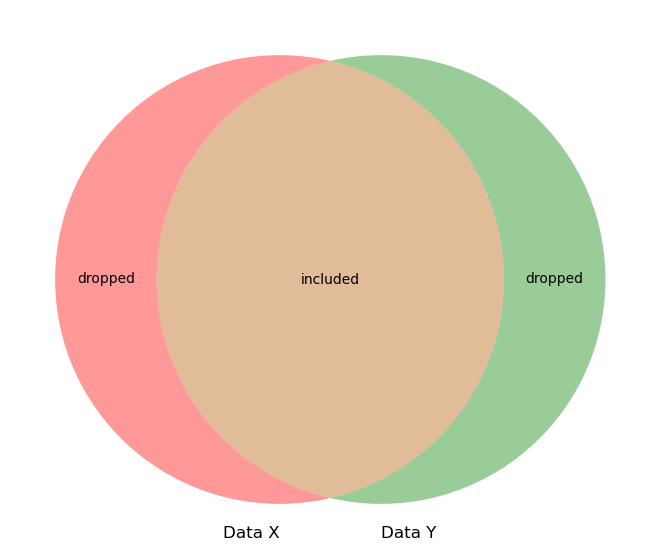

In [133]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.